### Objetivo

Se requiere realizar un dahsboard en PowerBi analizando la evolución, crecimiento de internet, usuarios, abonados, etc, en Argentina y sus causas


### Step 1: Import and read data
Se realiza EDA para revisión de 2 datasets

"Accesos a Internet por tipo de tecnologías"

"Penetración de Internet en Argentina cada 100 hogares"

In [127]:
import pandas as pd             # Análisis de datos
import numpy as np              # Computación numérica
import matplotlib.pylab as plt  # Visualización de datos
import seaborn as sns           # Visualización de datos
plt.style.use('ggplot')         # Estilo de gráfico 'ggplot'

In [128]:
df_tecnologias = pd.read_csv('Datasets\Internet_Accesos-por-tecnologia.csv')
df_penetracion = pd.read_csv('Datasets\Internet_Penetracion.csv')

### Step 2: Data Understanding
Dataframe Shape. Head and tail. dtypes.

In [129]:
#df_tecnologias.shape
#df_penetracion.shape

In [130]:
df_tecnologias.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,2,Buenos Aires,350.652,2.719.613,1.399.043,126.847,71.028,4.667.183
1,2022,2,Capital Federal,145.491,1.232.226,121.506,5.757,31.791,1.536.771
2,2022,2,Catamarca,11.928,9.430,42.087,1.329,2.234,67.008
3,2022,2,Chaco,29.552,61.284,42.194,8.178,2.356,143.564
4,2022,2,Chubut,45.377,69.242,9.574,29.784,8.828,162.805


In [131]:
df_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,"76,08"
1,2022,1,Capital Federal,"111,8"
2,2022,1,Catamarca,"58,21"
3,2022,1,Chaco,"44,06"
4,2022,1,Chubut,"88,05"


In [132]:
df_tecnologias.tail()
# La fila 816 debe ser eliminada

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
812,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
813,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
814,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
815,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032
816,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#Revisión de columnas
df_tecnologias.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

In [134]:
#Revisión de columnas
df_penetracion.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

In [135]:
#Revisión de tipo de datos
df_tecnologias.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [136]:
#Revisión de tipo de datos
df_penetracion.dtypes

Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object

### Step3. Data Preparation
1.Dropping irrelevant columns and rows

2.Identify duplicated columns

3.Renamming Columns

4.Feature Creation

In [137]:
#Eliminar la fila 816
df_tecnologias.drop(816, inplace=True)
df_tecnologias

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,2,Buenos Aires,350.652,2.719.613,1.399.043,126.847,71.028,4.667.183
1,2022,2,Capital Federal,145.491,1.232.226,121.506,5.757,31.791,1.536.771
2,2022,2,Catamarca,11.928,9.430,42.087,1.329,2.234,67.008
3,2022,2,Chaco,29.552,61.284,42.194,8.178,2.356,143.564
4,2022,2,Chubut,45.377,69.242,9.574,29.784,8.828,162.805
...,...,...,...,...,...,...,...,...,...
811,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
812,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
813,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
814,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038


In [138]:
# Verifica el tipo de datos de las columnas y elimina espacios en los nombres
df_tecnologias.columns = df_tecnologias.columns.str.strip()
df_tecnologias.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [139]:
#Esta funcion fue necesaria para corregir el problema de los decimales. en Cablemodem, Fibraoptica y Total
def convert_decimal_separator(value):
    if isinstance(value, str) and '.' in value:
        parts = value.split('.')
        if len(parts) == 3:
            integer_part = int(parts[0]) * 1000 + int(parts[1])
            decimal_part = float('.' + parts[2])
            return f'{integer_part + decimal_part:.3f}'
        elif len(parts) == 2:
            integer_part = int(parts[0])
            decimal_part = float('.' + parts[1])
            return f'{integer_part + decimal_part:.3f}'
    return value

In [140]:
filtro = df_tecnologias['Cablemodem'].notna() & df_tecnologias['Cablemodem'].str.contains('\.\d{3}\.\d{3}')
df_tecnologias.loc[filtro, 'Cablemodem'] = df_tecnologias.loc[filtro, 'Cablemodem'].dropna().apply(convert_decimal_separator).astype(float)

In [141]:
filtro = df_tecnologias['Fibra óptica'].notna() & df_tecnologias['Fibra óptica'].str.contains('\.\d{3}\.\d{3}')
df_tecnologias.loc[filtro, 'Fibra óptica'] = df_tecnologias.loc[filtro, 'Fibra óptica'].dropna().apply(convert_decimal_separator).astype(float)

In [142]:
filtro = df_tecnologias['Total'].notna() & df_tecnologias['Total'].str.contains('\.\d{3}\.\d{3}')
df_tecnologias.loc[filtro, 'Total'] = df_tecnologias.loc[filtro, 'Total'].dropna().apply(convert_decimal_separator).astype(float)

In [162]:
df_tecnologias

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,2,Buenos Aires,350.652,2719.613,1399.043,126.847,71.028,4667.183
1,2022,2,Capital Federal,145.491,1232.226,121.506,5.757,31.791,1536.771
2,2022,2,Catamarca,11.928,9.430,42.087,1.329,2.234,67.008
3,2022,2,Chaco,29.552,61.284,42.194,8.178,2.356,143.564
4,2022,2,Chubut,45.377,69.242,9.574,29.784,8.828,162.805
...,...,...,...,...,...,...,...,...,...
811,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
812,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
813,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
814,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038


In [144]:
# Revisar datos faltantes por columna
df_penetracion.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [145]:
# Revisar datos faltantes por columna
df_tecnologias.isna().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [146]:
# Revisión de valores únicos en año
print(df_tecnologias['Año'].unique())

# Se encontró "2019 *" 

['2022' '2021' '2020' '2019' '2019 *' '2018' '2017' '2016' '2015' '2014']


In [147]:
# Corrección de la columna año
df_tecnologias['Año'] = df_tecnologias['Año'].replace('2019 *', '2019')
df_tecnologias['Año'].value_counts()

2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2022    48
Name: Año, dtype: int64

In [148]:
#Revisión de valores únicos para Trimestre
print(df_tecnologias['Trimestre'].unique())

# Se encontró '3 *' '2 *' '1 *'

['2' '1' '4' '3' '3 *' '2 *' '1 *']


In [149]:
# Corregir valores en la columna Trimestre
df_tecnologias['Trimestre'] = df_tecnologias['Trimestre'].replace('3 *', '3')
df_tecnologias['Trimestre'] = df_tecnologias['Trimestre'].replace('2 *', '2')
df_tecnologias['Trimestre'] = df_tecnologias['Trimestre'].replace('1 *', '1')

In [150]:
#Revisión de valores únicos en Provincia
print(df_tecnologias['Provincia'].unique())

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [151]:
df_tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           816 non-null    object 
 1   Trimestre     816 non-null    object 
 2   Provincia     816 non-null    object 
 3   ADSL          816 non-null    object 
 4   Cablemodem    816 non-null    object 
 5   Fibra óptica  816 non-null    object 
 6   Wireless      816 non-null    float64
 7   Otros         816 non-null    float64
 8   Total         816 non-null    object 
dtypes: float64(2), object(7)
memory usage: 57.5+ KB


In [152]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           792 non-null    int64 
 1   Trimestre                     792 non-null    int64 
 2   Provincia                     792 non-null    object
 3   Accesos por cada 100 hogares  792 non-null    object
dtypes: int64(2), object(2)
memory usage: 24.9+ KB


In [153]:
# Revisión de valores únicos en año
print(df_penetracion['Año'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [154]:
# Revisión de valores únicos en Trimestre
print(df_penetracion['Trimestre'].unique())

[1 4 3 2]


In [155]:
# Revisión de valores únicos en Provincia
print(df_penetracion['Provincia'].unique())

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


### Step 4: Feature Understanding
Ploting Feature Distribution

C:\Users\Angel Zavaleta\AppData\Local\Temp\ipykernel_6836\1236707049.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_grafica = df_tecnologias.groupby(['Año', 'Trimestre']).sum()


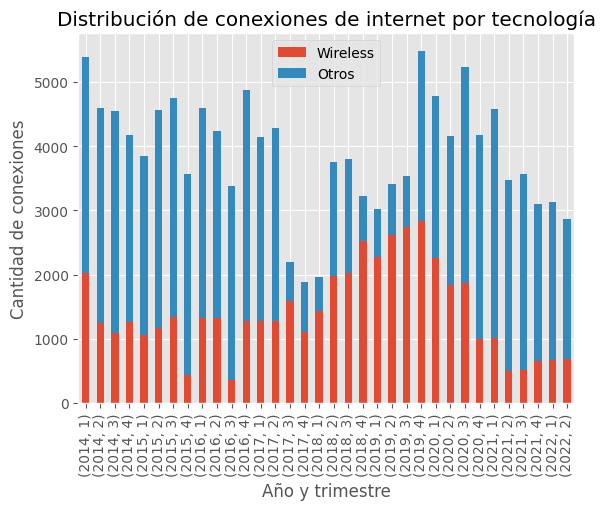

In [156]:
# Agrupar los datos por año y trimestre, y sumar por tecnología
datos_grafica = df_tecnologias.groupby(['Año', 'Trimestre']).sum()

# Crear un gráfico de barras apiladas
datos_grafica.plot(kind='bar', stacked=True)

# Agregar título y etiquetas de eje
plt.title('Distribución de conexiones de internet por tecnología')
plt.xlabel('Año y trimestre')
plt.ylabel('Cantidad de conexiones')

# Mostrar el gráfico
plt.show()

C:\Users\Angel Zavaleta\AppData\Local\Temp\ipykernel_6836\2179804545.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_grafica2 = df_tecnologias.groupby(['Provincia']).sum()


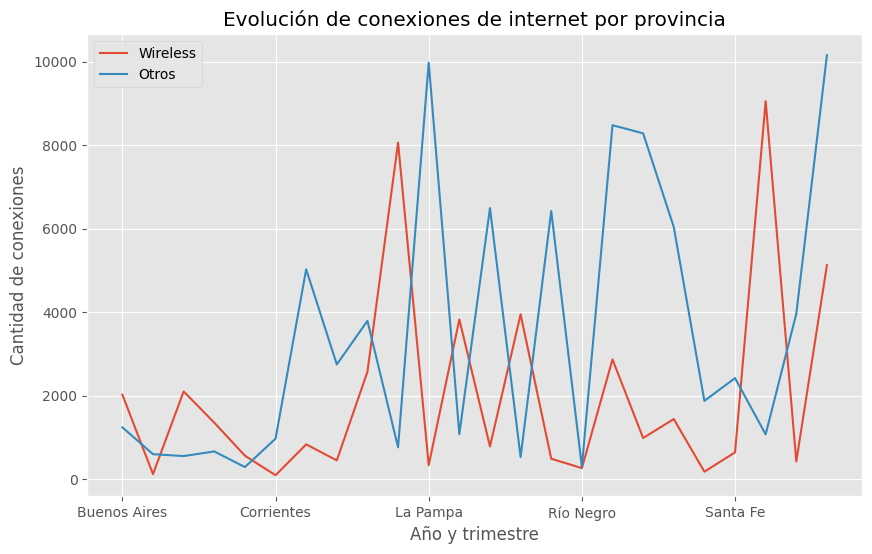

In [157]:
# Agrupar los datos por provincia y sumar por año y trimestre
datos_grafica2 = df_tecnologias.groupby(['Provincia']).sum()

# Crear un gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
datos_grafica2.plot(ax=ax)

# Agregar título y etiquetas de eje
ax.set_title('Evolución de conexiones de internet por provincia')
ax.set_xlabel('Año y trimestre')
ax.set_ylabel('Cantidad de conexiones')

# Mostrar el gráfico
plt.show()

In [161]:
# Export the df_tecnologias dataset to a new CSV file with a different name
df_tecnologias.to_csv('CleanData/tecnologias_ar.csv', index=False)

In [160]:
# Export the df_tecnologias dataset to a new CSV file with a different name
df_penetracion.to_csv('CleanData/internet100_ar.csv', index=False)